In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.5f}'.format)

%matplotlib inline

In [50]:
amazon_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [51]:
#1 Frequency Table
frequency_table = amazon_df['category'].value_counts()

In [52]:
#Top 5 most listed product categories
top_5 = frequency_table.head(5)

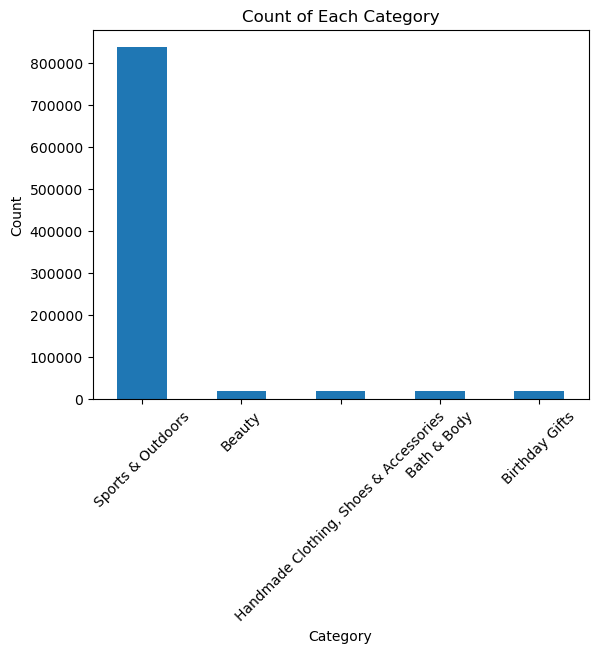

In [53]:
top_5.plot(kind='bar')

plt.title('Count of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

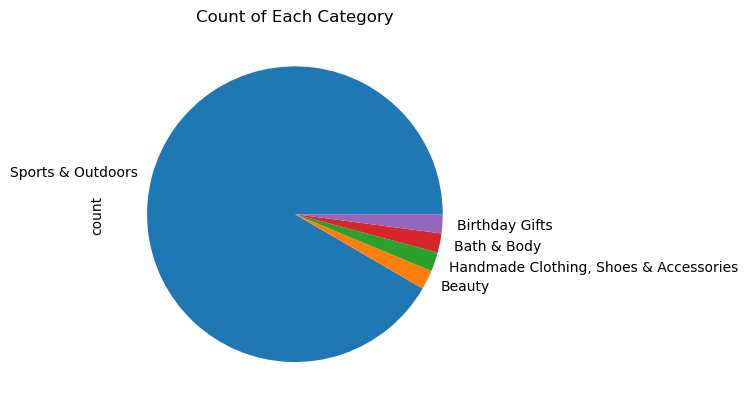

In [54]:
top_5.plot(kind='pie')

plt.title('Count of Each Category')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

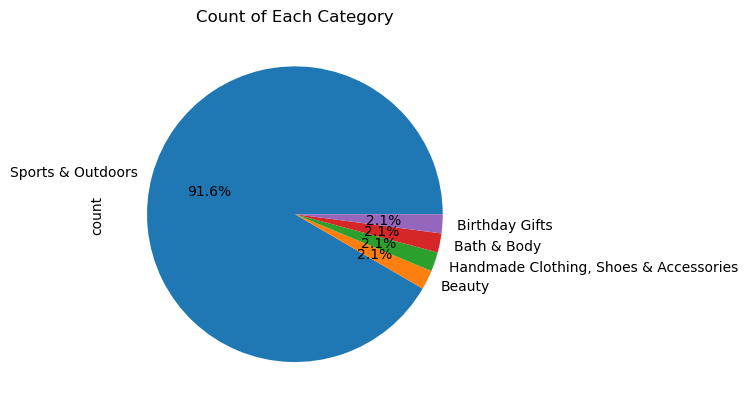

In [55]:
top_5.plot.pie(autopct='%1.1f%%')

plt.title('Count of Each Category')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

In [56]:
#2 Delving into Product Pricing

In [57]:
#2.1 Measures of Centrality

In [58]:
mean = float(amazon_df['price'].mean())

In [59]:
median = float(amazon_df['price'].median())

In [60]:
import statistics
mode = float(amazon_df['price'].mode())

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_79313/2337781694.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mode = float(amazon_df['price'].mode())


In [61]:
mean

89.24380943923663

In [62]:
mode

9.99

In [63]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [64]:
'''The mean is much higher than the mode, the average price is 89 dollars, on the other hand the most listed price is 9.99 dollars'''

'The mean is much higher than the mode, the average price is 89 dollars, on the other hand the most listed price is 9.99 dollars'

In [65]:
#2.1 Measures of Dispersion

In [66]:
amazon_df['price'].describe()

count   2443651.00000
mean         89.24381
std         345.60886
min           0.00000
25%           9.99000
50%          19.09000
75%          45.99000
max      100000.00000
Name: price, dtype: float64

In [67]:
'''Taking into consideration the standard deviation, mean, mode. I can conclude that the prices are extremely varied. 
We can also see it in the max that brings an extreme outlier'''

'Taking into consideration the standard deviation, mean, mode. I can conclude that the prices are extremely varied. \nWe can also see it in the max that brings an extreme outlier'

In [68]:
#2.3 Visualizations

In [69]:
# Discretizing 'SalePrice' into 4 categories
bins = [0, 15.33, 30.66, 45.99, amazon_df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
amazon_df['price_new'] = pd.cut(amazon_df['price'], bins=bins, labels=labels, include_lowest=True)

In [70]:
amazon_df['price'].value_counts()

price
9.99000       48922
12.99000      38823
8.99000       34058
7.99000       33632
14.99000      32570
              ...  
2398.99000        1
1453.08000        1
1785.63000        1
1347.36000        1
317.34000         1
Name: count, Length: 82916, dtype: int64

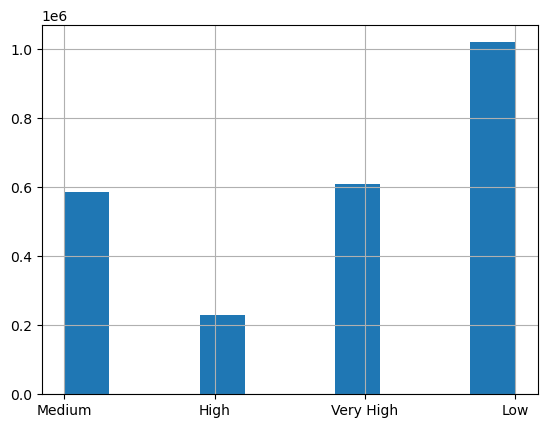

In [71]:
amazon_df['price_new'].hist()
plt.show()

In [72]:
'''products were inicially hard to visualize because there were outliers that made the graph very hard to look at.
So optimally the way of doing it is categorizing it into bins so that the information is better visualized'''

'products were inicially hard to visualize because there were outliers that made the graph very hard to look at.\nSo optimally the way of doing it is categorizing it into bins so that the information is better visualized'

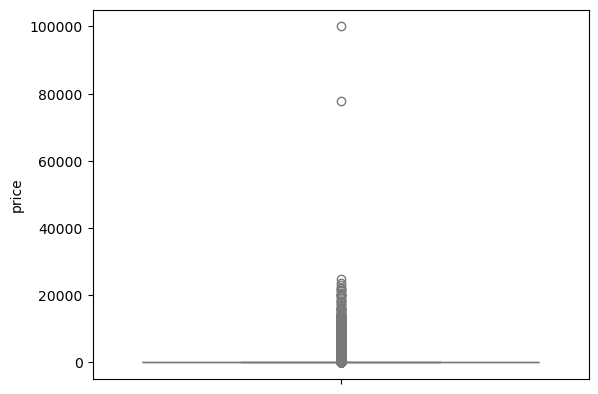

In [73]:
sns.boxplot(data = amazon_df['price'], color="lightblue")
plt.show()

In [74]:
'''yes there are several products that are outliers ranging from 1000 up to 1000000'''

'yes there are several products that are outliers ranging from 1000 up to 1000000'

In [75]:
#Part 3 Unpacking Product Ratings

In [76]:
float(amazon_df['stars'].mean())

2.152836472966065

In [77]:
float(amazon_df['stars'].mode())

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_79313/423785822.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(amazon_df['stars'].mode())


0.0

In [78]:
float(amazon_df['stars'].median())

0.0

In [32]:
# amazon_df['stars'] = amazon_df['stars'].replace(0,pd.NA) # to susbtitute all 0's with null values

In [ ]:
# How do customers generally rate products? Is there a common trend?

In [ ]:
'''Customers are usually rating the products on 4.3 stars, and the most repeated value is 4.4'''

In [ ]:
# Measures of dispersion

In [80]:
amazon_df['stars'] = amazon_df[['stars']].applymap(float)

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_79313/92675555.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  amazon_df['stars'] = amazon_df[['stars']].applymap(float)


In [81]:
amazon_df.dtypes

uid                     int64
asin                   object
title                  object
stars                 float64
reviews                 int64
price                 float64
isBestSeller             bool
boughtInLastMonth       int64
category               object
price_new            category
dtype: object

In [85]:
filtered_df = amazon_df[(amazon_df['stars'] > 0)]

In [88]:
filtered_df['stars'].describe()

count   1218010.00000
mean          4.31916
std           0.55529
min           1.00000
25%           4.10000
50%           4.40000
75%           4.60000
max           5.00000
Name: stars, dtype: float64

In [94]:
filtered_df['stars'].var()

0.30834337523805183

In [ ]:
'''The ratings are pretty consistent because the standard deviation is 0.55 and variance is .30. Which mean
that numbers are really not that far away from the mean'''

In [98]:
skewness_stars = filtered_df['stars'].skew()
kurtosis_stars = filtered_df['stars'].kurtosis()
skewness_stars, kurtosis_stars

(np.float64(-2.3795681122127945), np.float64(9.78193769066435))

In [ ]:
'''It is a negatively skewed graph because it is under 0, which means most of the values are together on the higher end
of the spectrum. Also it has high curtosis

The ratings are distributed leaning towards the higher end of the spectrum'''

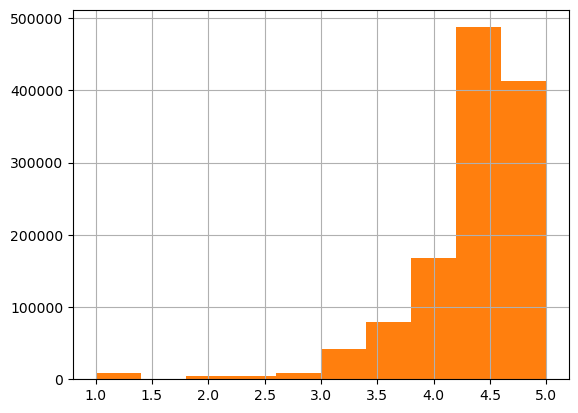

In [100]:
filtered_df['stars'].hist()
plt.show()

In [ ]:
'''The ratings that are more common are in 4.2'''